### problem statement

Given an 2d image with disjoint regions filled in. Assign a label to every pixel signifying the region to which it belongs

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
class UnionFind(object):
    def __init__(self, size):
        # we create a list where the index is the node_id
        # and the value is the node_id's parent
        self.node2parent = range(size)
        
    
    def merge(self, a, b):
        a_parent = self.find_parent(a)
        b_parent = self.find_parent(b)
        if a_parent == b_parent:
            return
        
        if a_parent < b_parent:
            self.node2parent[b] = a_parent
        else:
            self.node2parent[a] = b_parent

       
    def find_parent(self, a):
        parent = self.node2parent[a]
        while True:
            if parent == self.node2parent[parent]:
                return parent
            else:
                parent = self.node2parent[parent]

          

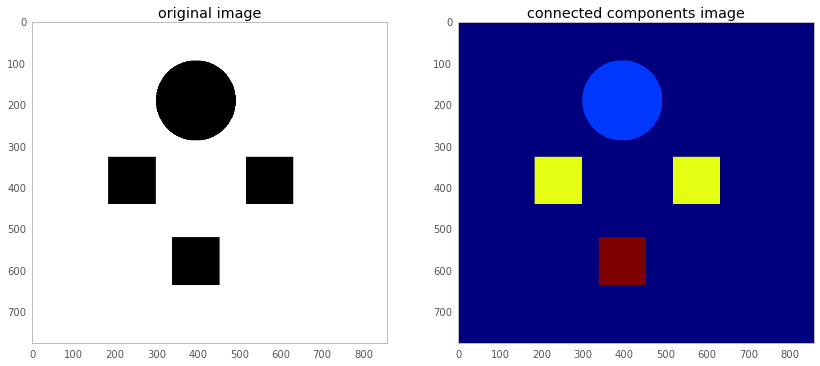

In [17]:
import numpy as np
from PIL import Image

pim = Image.open("a.png")
nim = np.array(pim)
gray = np.sum(nim, axis=2)/4

# create a thresholded image
bw = np.zeros_like(gray)
bw[gray < 255] = 0
bw[gray == 255] = 255

rows, cols = bw.shape
uf = UnionFind(rows*cols)

def pixel_id(y, x):
    return y * cols + x

for i in range(0, rows):
    for j in range(0, cols):
        pixel = bw[i,j]
        for di in [-1,0,1]:
            for dj in [-1,0,1]:
                k = min(max(0,i+di), rows-1)
                l = min(max(0,j+dj), cols-1)
                neighbor = bw[k,l]
                if pixel == neighbor:
                    uf.merge(pixel_id(i,j), pixel_id(k,l))
            
segmentations = np.array([uf.find_parent(i) for i in range(rows*cols)]).reshape(rows,cols)

figsize(14,14)
subplot(121)
title("original image")
imshow(bw, cmap=cm.gray)
subplot(122)
title("connected components image")
imshow(segmentations)